# DataGenZ Project 
#### Author: Blessing Austin-Gabriel

### Information Here
- Details of the information here

### Questions
<ul>
<li>Are patients with diabetes more likely to develop heart disease at an early age?
<li>Is there a certain demographic group that is at higher risk of heart disease than others?
<li>Does frequent exercise lower the risk of developing heart disease?
<li>Are smokers more likely to develop heart disease than non-smokers?
<li>My Added Question: Does Gender and age coupled with any other underlying factor pose the risk of predisposition?
<ul>

-------    
- Hope you like my work!

In [16]:
# importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

AttributeError: Module 'scipy' has no attribute '_lib'

In [12]:
# creating a dataframe

framingham = pd.read_csv('Framingham-Heart-Study.csv')
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
# shape of the dataset

print('No. of Records :', framingham.shape[0], '\nNo. of Features :', framingham.shape[1])

No. of Records : 4240 
No. of Features : 16


In [14]:
# Checking the attribute of the dataset

framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Data Cleaning

In [5]:
# checking for null values

framingham.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [6]:
framingham.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# To find the null percentage we divide the above witht the amount defined in each feature's and then multiply it by 100

framingham.isnull().sum()/framingham.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

We now have the amount of null values present in each feature
<ul>
    <li> education - 2.47 of 100%
    <li> cigsPerDay - 0.68 of 100%
    <li>    BPMeds - 1.25 of 100%
    <li>    totChol - 1.17 of 100%
    <li>   BMI - 0.44 of 100%
    <li>   heartRate 0.44 of 100%
    <li>    glucose 9.15 of 100%
<ul>

In [8]:
# creating a function for missing vlaue imputation

def inputvalue(data):
    return data.fillna(data.median())

In [9]:
# Inputation

framingham.education = framingham['education'].transform(inputvalue)
framingham.BPMeds = framingham['BPMeds'].transform(inputvalue)
framingham.totChol = framingham['totChol'].transform(inputvalue)
framingham.heartRate = framingham['heartRate'].transform(inputvalue)
framingham.glucose = framingham['glucose'].transform(inputvalue)

# group by category

by_currentsmoker = framingham.groupby(['currentSmoker'])
framingham.cigsPerDay = by_currentsmoker['cigsPerDay'].transform(inputvalue)

by_age = framingham.groupby(['male','age'])
framingham.BMI = by_age['BMI'].transform(inputvalue)

In [10]:
# checking for missing nulls after data input

framingham.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Yayy. No more missing vlaues in the dataset, now we can procede to explore the data to get more information with Exploratory Data Analysis

### Brief Explanation
What happened above was; I used the function 'fillna' which iterates through the dataset to then fill up the missing values, and I put in median as the means it was going to fill this data by. I chose mean as it will find an average point and would help me stay closer to the true value than inputing a random value myself


## Eploratory Data Analysis (EDA)

This part explore the use of Univariate, Bivariate and Multivariate Analysis. (using one or more characteristics or atribute to get information)

This will help us to answer our desried question and reach our objectives.

In [11]:
# descibing the dataset helps us to realise the discrete and continious variables.

framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From the above we can tell the min and maximum of each continious dataset. The continuous variables are as follows:
1. Gluclose
2. totChol
3. sysBP
4. diaBP
5. BMI
6. heartRate

<Axes: >

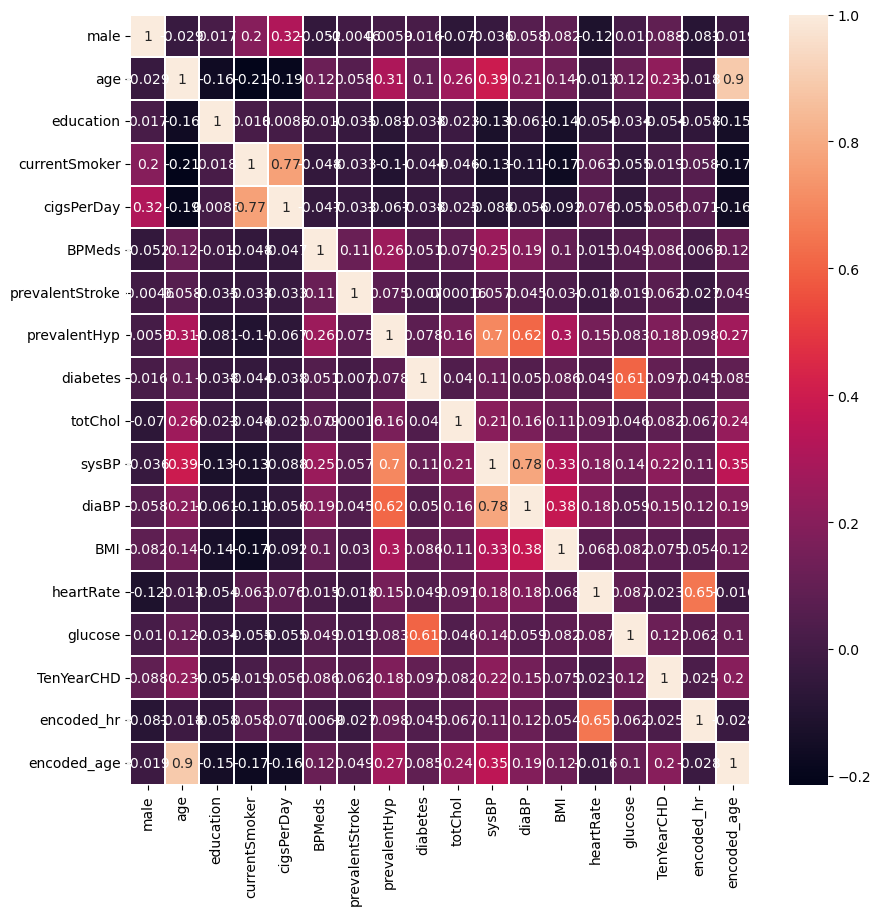

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(framingham.corr(), annot=True, linewidths=0.1)

From pairplot and heatmap we see that sysBP and diaBP are highly correlated

And currentSmoker and cigsPerDay are highly correlated

Text(0.5, 1.0, 'CHD against Gender')

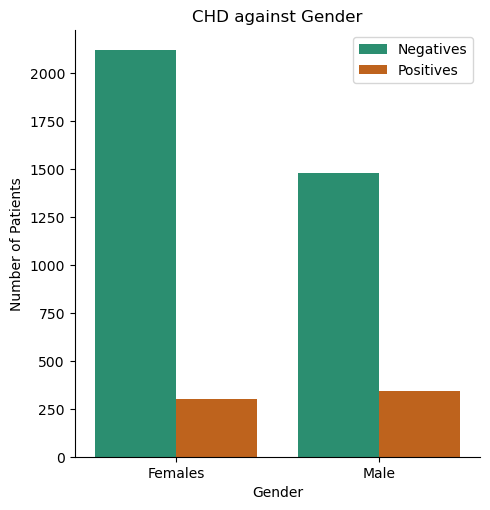

In [13]:
# plotting CHD against Gender Visualization

sns.catplot(x='male', hue='TenYearCHD', data=framingham, kind='count', palette='Dark2', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Females','Male'])
plt.ylabel('Number of Patients')
plt.legend(['Negatives', 'Positives'])
plt.title('CHD against Gender')

### Observation

This observation shows the amount of males and females suffering from a ten year Coronary Heart Disease.

1. **Negative:** The above analysis shows that more females are falling into the negative category than men.

2. **Posiitve:** It also shows that the same amout of males and females are suffering from CHD 

C:\Users\Blessing Austin\AppData\Local\Temp\ipykernel_41540\2193391586.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(framingham['glucose'] , color='green')
C:\Users\Blessing Austin\AppData\Local\Temp\ipykernel_41540\2193391586.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(framingham

Text(0.5, 1.0, 'Distribution of BMI')

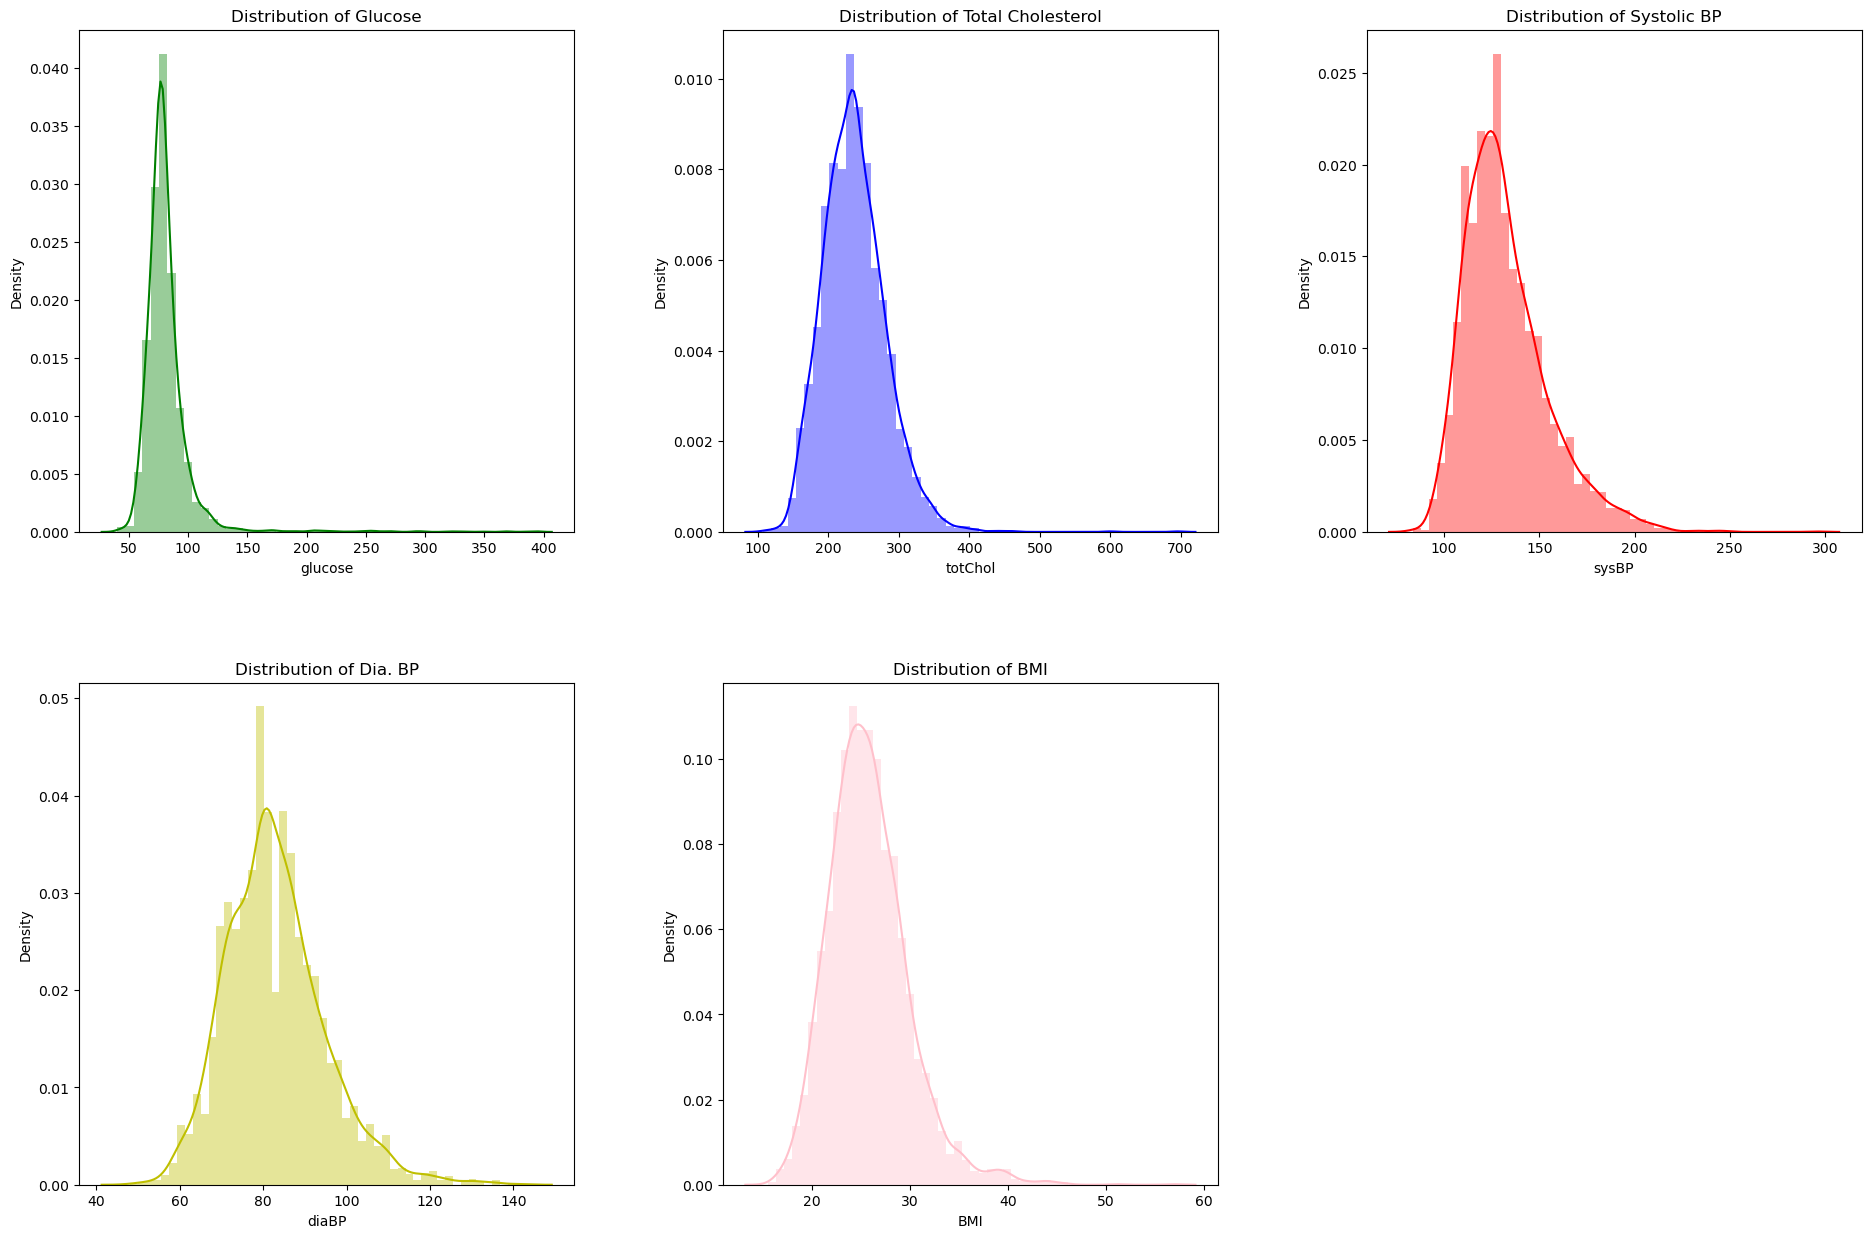

In [14]:
# plotting the distribution of the continious variables, Univariate Analysis

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(framingham['glucose'] , color='green')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(framingham['totChol'], color='blue')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(framingham['sysBP'], color='red')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(framingham['diaBP'] , color='y')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(framingham['BMI'], color='pink')
plt.title('Distribution of BMI')

Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right

There are more positive values for Glucose, Total Cholesterol, Systolic BP & BMI because they Right Skewed while Diastolic BP & Heart Rate are close to Normal Distribution

In [17]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(10,10))
sns.swarmplot(x='TenYearCHD', y='age', data=framingham, hue='currentSmoker')

NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

Patients who have a ten year CHD risk smoke more cigarettes per day than those who do not.

<Axes: xlabel='TenYearCHD', ylabel='age'>

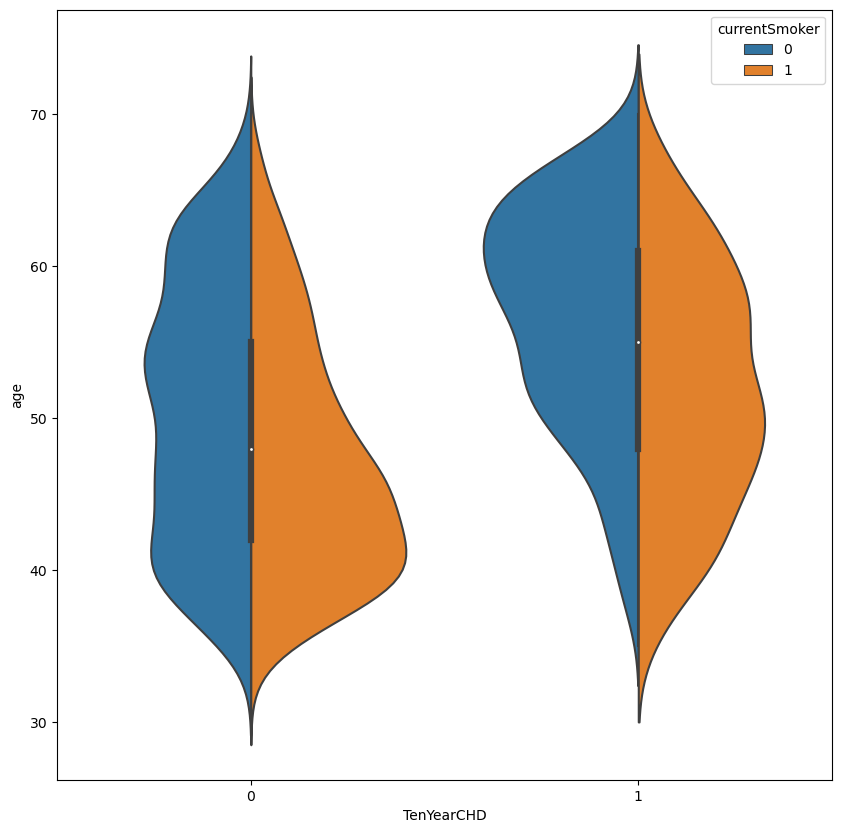

In [16]:
# relationship between age and the ten year risk of CHD

plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=framingham, hue='currentSmoker', split=True)

Older patients demonstrate a higher propensity for developing Coronary Heart Disease (CHD). Moreover, smokers face a greater risk of CHD at a younger age when compared to non-smokers. These findings emphasize the significance of age and smoking status as crucial risk factors for CHD development, warranting focused preventive interventions.

C:\Users\Blessing Austin\AppData\Local\Temp\ipykernel_41540\4181299433.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(framingham['age'], bins=10, kde=True, color='orange')


Text(0.5, 1.0, 'Age distribution of the patients')

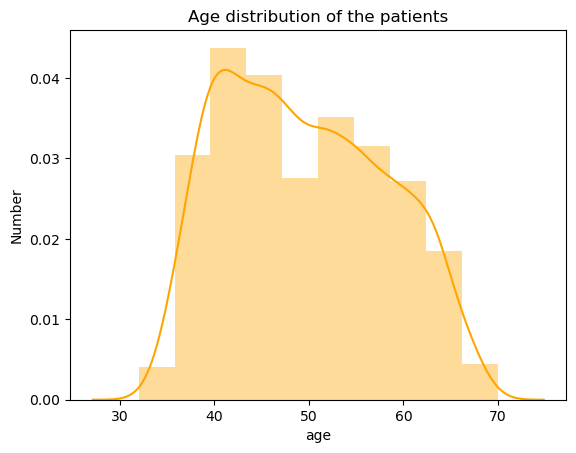

In [17]:
sns.distplot(framingham['age'], bins=10, kde=True, color='orange')
plt.ylabel('Number')
plt.title('Age distribution of the patients')

C:\Users\Blessing Austin\AppData\Local\Temp\ipykernel_41540\2577106219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(framingham['heartRate'], bins=10, kde=True, color='grey')


Text(0.5, 1.0, 'HeartRate distribution of the patients')

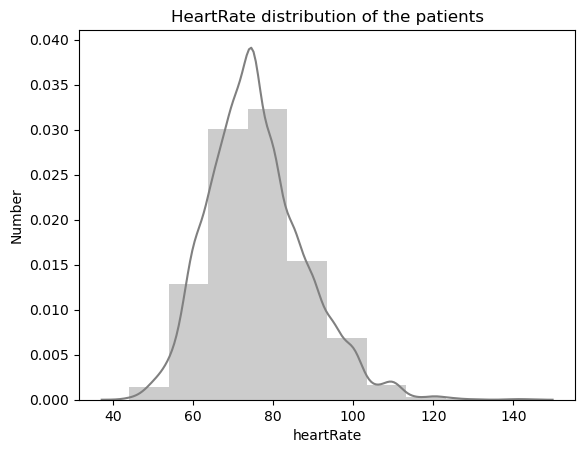

In [18]:
sns.distplot(framingham['heartRate'], bins=10, kde=True, color='grey')
plt.ylabel('Number')
plt.title('HeartRate distribution of the patients')

To enhance the uni-variate statistical analysis, the facyor type variables will be encoded using true or false and defined classes.

The below code returns 1 or 2 for the stated category

In [19]:
# encoding age and heartrate

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
framingham['encoded_hr'] = framingham['heartRate'].apply(heartrate_enc)
framingham['encoded_age'] = framingham['age'].apply(lambda x : encode_age(x))

Suject with Age <= 40 are Adults.
Subject with Age > 40 and <= 55 are Middle-Aged Adult.
Subject Above 55 will fall in Senior Category.

the below returns the various classes in respect to the Y axis

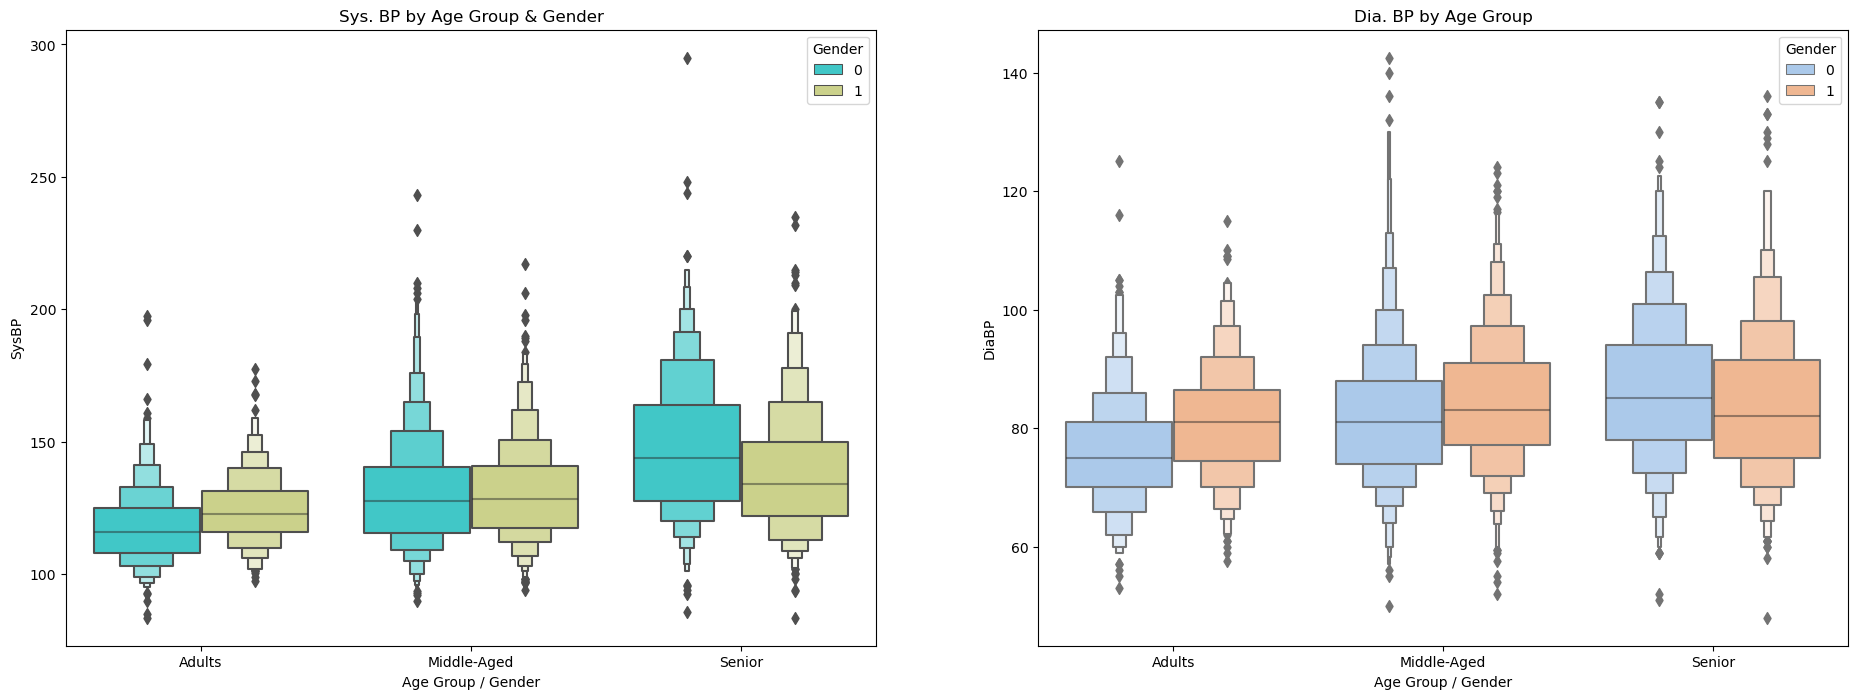

In [20]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encoded_age', y='sysBP', hue='male', data=framingham, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('SysBP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encoded_age', y='diaBP', hue='male', data=framingham, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('DiaBP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP by Age Group')
plt.legend(title='Gender')

Observations :

1. SysBP is increasing by Age Group and Gender.
2. The DiaBP is also increasing by Age Group & Gender.

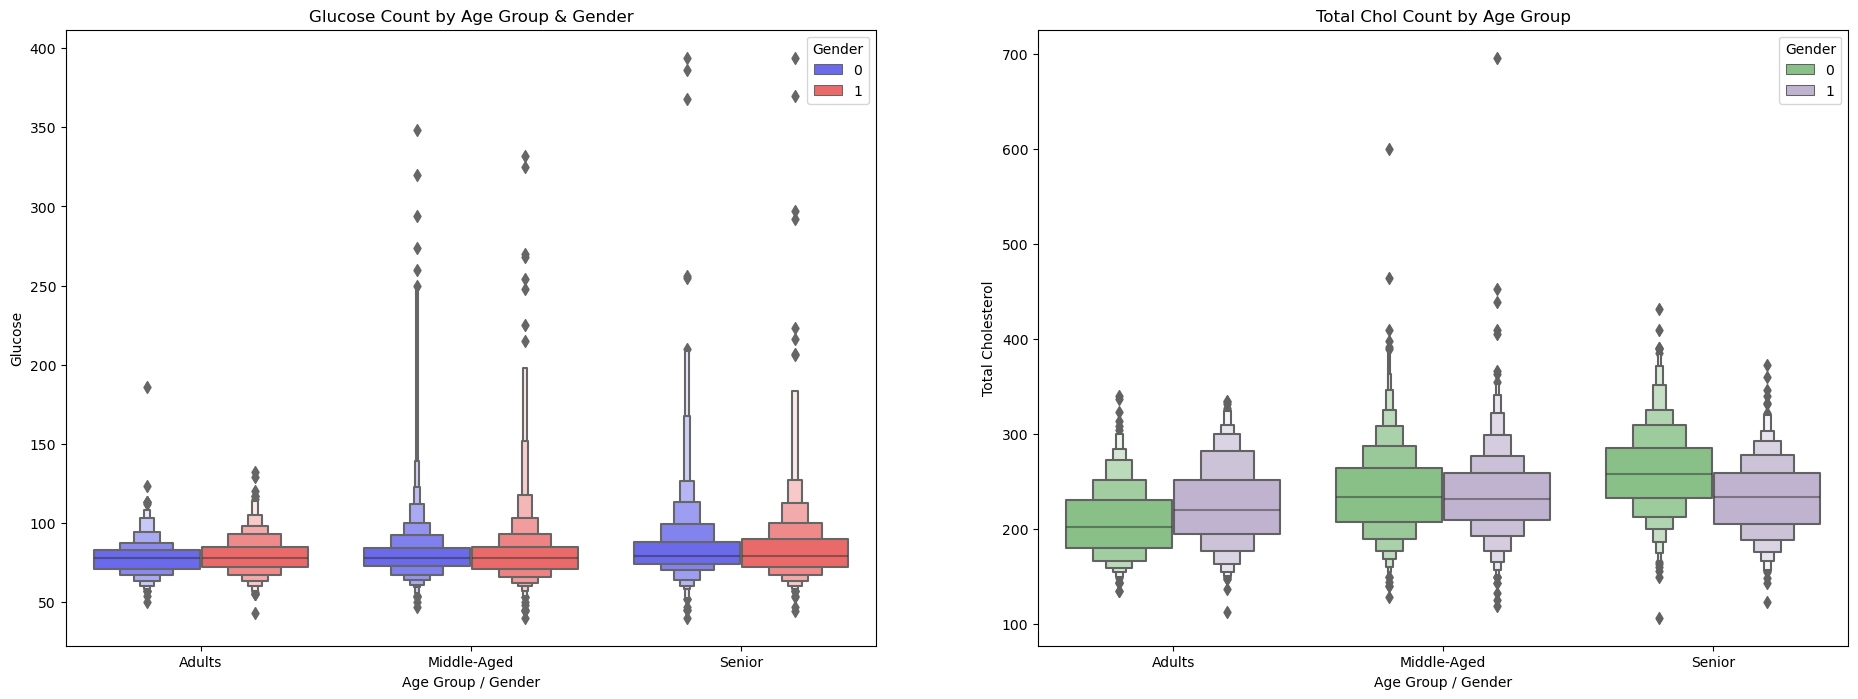

In [21]:
#Multivariate Analysis part 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encoded_age', y='glucose', hue='male', data=framingham, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encoded_age', y='totChol', hue='male', data=framingham, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol Count by Age Group')
plt.legend(title='Gender')

Observations:

1. *Glucose Count by Age Group & Gender:* This shows a positive correlation between age and glucose levels. As individuals age, their glucose counts tend to increase. Regarding gender differences, the median glucose count is similar for both males and females, with a few outliers in each group.

2. *Total Cholesterol by Age Group & Gender:* After excluding outliers, we observe that cholesterol levels in females increase with age, considering the Quantile values (25%, 50%, 75%). On the other hand, for males, the cholesterol level Quantiles remain approximately similar across different age groups.

Text(0.5, 1.0, 'Diabetes by Age Group')

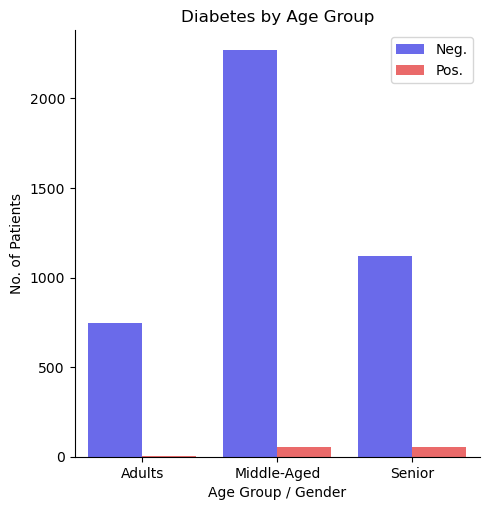

In [22]:
#Diabetes by Age Group

sns.catplot(x='encoded_age', hue='diabetes', data=framingham, kind='count', palette='seismic', legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

In [23]:
# To understand correlation between some features, pairplot is used
plt.figure(figsize=(20,15))
sns.pairplot(framingham.loc[:,'totChol': 'glucose'])


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002AB1CF4A5F0> (for post_execute):



KeyboardInterrupt



<Figure size 2000x1500 with 0 Axes>

Error in callback <function flush_figures at 0x000002AB1F2EC3A0> (for post_execute):



KeyboardInterrupt



Text(0.5, 1.0, 'Target Class Count')

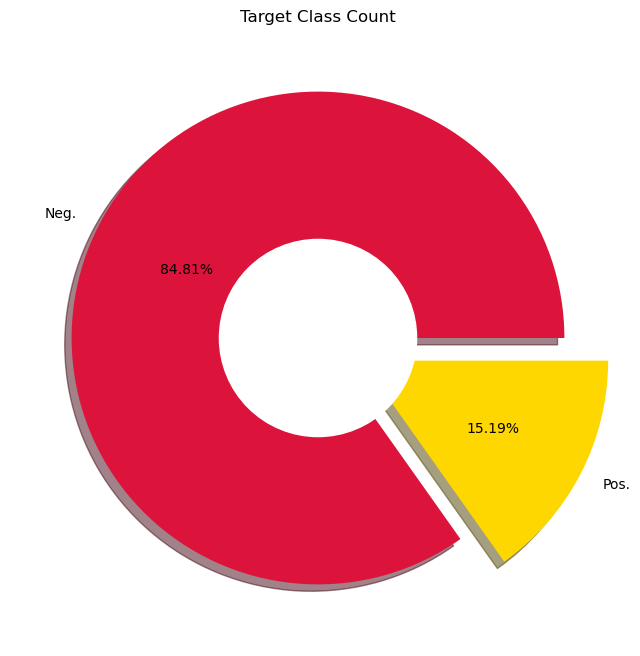

In [24]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(framingham['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

# THANK YOU FOR READING
